In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker
from PIL import Image
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from fractions import Fraction
font = {'family' : 'Times New Roman',
    'weight' : 'light',
    'size'   : 13,
    }
plt.rc('font',family='Times New Roman')

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'  # 用于正常数学文本
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'  # 用于斜体数学文本

#def curve_color():
def set_axis(axes,xmaj=0.5,xmin=0.125,ymaj=0.5,ymin=0.125,aspect=None):
    if aspect:
        axes.set_aspect(aspect)
    axes.minorticks_on()
    axes.tick_params(axis="both", which="major", direction="in", width=1, length=4, labelsize=10)
    axes.tick_params(axis="both", which="minor", direction="in", width=1, length=2, labelsize=10)

    axes.xaxis.set_major_locator(MultipleLocator(xmaj))
    axes.xaxis.set_minor_locator(MultipleLocator(xmin))
    axes.yaxis.set_major_locator(MultipleLocator(ymaj))
    axes.yaxis.set_minor_locator(MultipleLocator(ymin))                    
    axes.set_xlabel(r'$Re$',fontdict={'size': 12})
    axes.set_ylabel(r'$Im$',fontdict={'size': 12})

In [ ]:
Z=lambda k,c,mu=0.01: -4*mu*np.abs(c)*(1-np.cos(k))**2-c*np.sin(k)*1j
G=lambda z: 1+z+1/2*z**2+1/6*z**3+1/24*z**4
theta=np.linspace(0,2*np.pi,1000)

In [3]:
for c in np.linspace(1,3,10001):
    if not np.max(np.abs(G(Z(theta,c))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c))))<=1))
        break

CFL: 2.8932, 放大因子在单位圆内: False


2.8284271247461903
CFL: 2.8284271247461903, 放大因子在单位圆内: True
2.89
CFL: 2.89, 放大因子在单位圆内: True
2.9
CFL: 2.9, 放大因子在单位圆内: False
2.91
CFL: 2.91, 放大因子在单位圆内: False


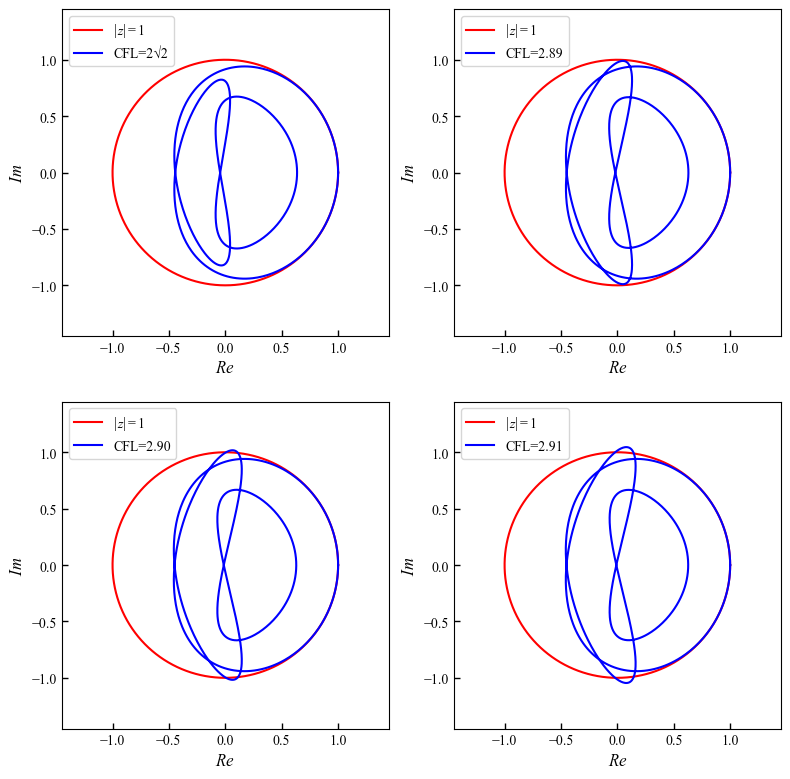

In [4]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[2*np.sqrt(2),2.89,2.90,2.91]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['2√2','2.89','2.90','2.91']
#['2√2','2.8931','2.8932','3']
mu=0.01
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [5]:
mu=0.1
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 1.7409, 放大因子在单位圆内: False


1.73
CFL: 1.73, 放大因子在单位圆内: True
1.74
CFL: 1.74, 放大因子在单位圆内: True
1.75
CFL: 1.75, 放大因子在单位圆内: False
1.76
CFL: 1.76, 放大因子在单位圆内: False


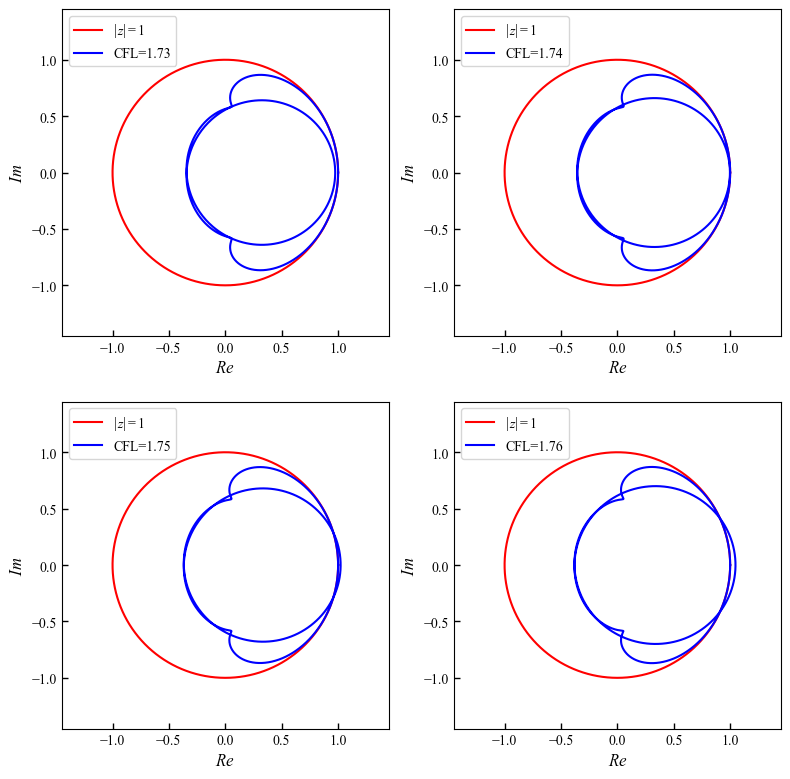

In [6]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[1.73,1.74,1.75,1.76]
_name=['1.73','1.74','1.75','1.76']
mu=0.1
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [7]:
mu=1
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 0.17429999999999998, 放大因子在单位圆内: False


0.16
CFL: 0.16, 放大因子在单位圆内: True
0.17
CFL: 0.17, 放大因子在单位圆内: True
0.18
CFL: 0.18, 放大因子在单位圆内: False
0.19
CFL: 0.19, 放大因子在单位圆内: False


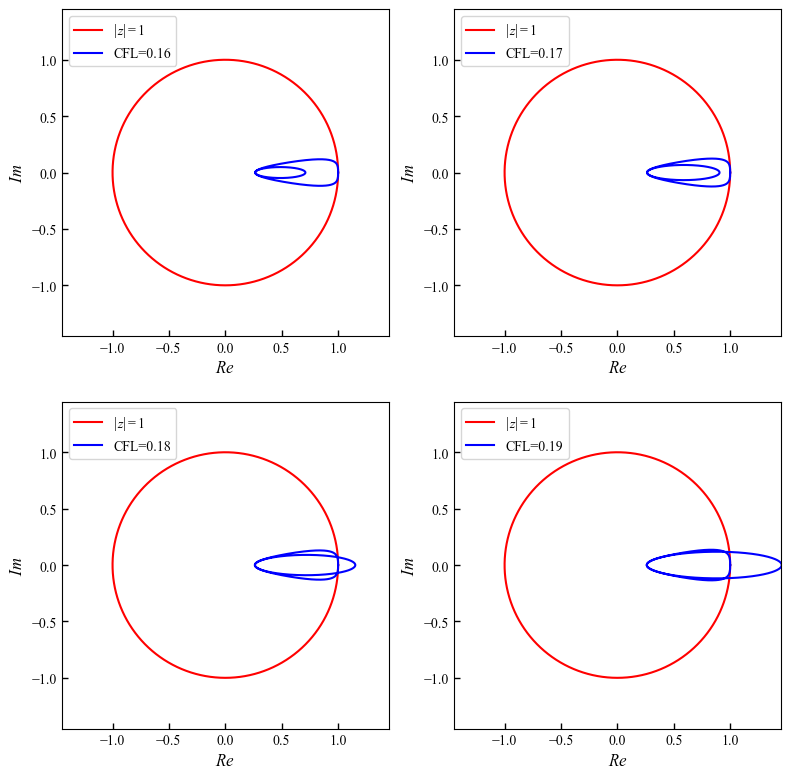

In [8]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[0.16,0.17,0.18,0.19]
_name=['0.16','0.17','0.18','0.19']
mu=1
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [9]:
mu=0.001
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 2.8367999999999998, 放大因子在单位圆内: False


2.8284271247461903
CFL: 2.8284271247461903, 放大因子在单位圆内: True
2.83
CFL: 2.83, 放大因子在单位圆内: True
2.84
CFL: 2.84, 放大因子在单位圆内: False
2.85
CFL: 2.85, 放大因子在单位圆内: False


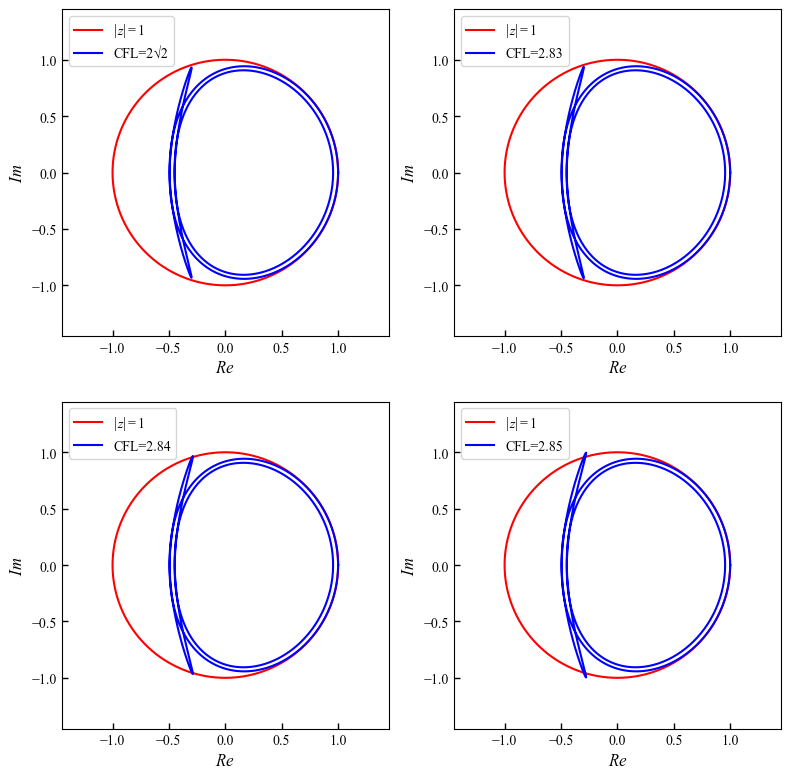

In [10]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[2*np.sqrt(2),2.83,2.84,2.85]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['2√2','2.83','2.84','2.85']
#['2√2','2.8931','2.8932','3']
mu=0.001
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [11]:
mu=0.005
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 2.8655999999999997, 放大因子在单位圆内: False


2.85
CFL: 2.85, 放大因子在单位圆内: True
2.86
CFL: 2.86, 放大因子在单位圆内: True
2.87
CFL: 2.87, 放大因子在单位圆内: False
2.88
CFL: 2.88, 放大因子在单位圆内: False


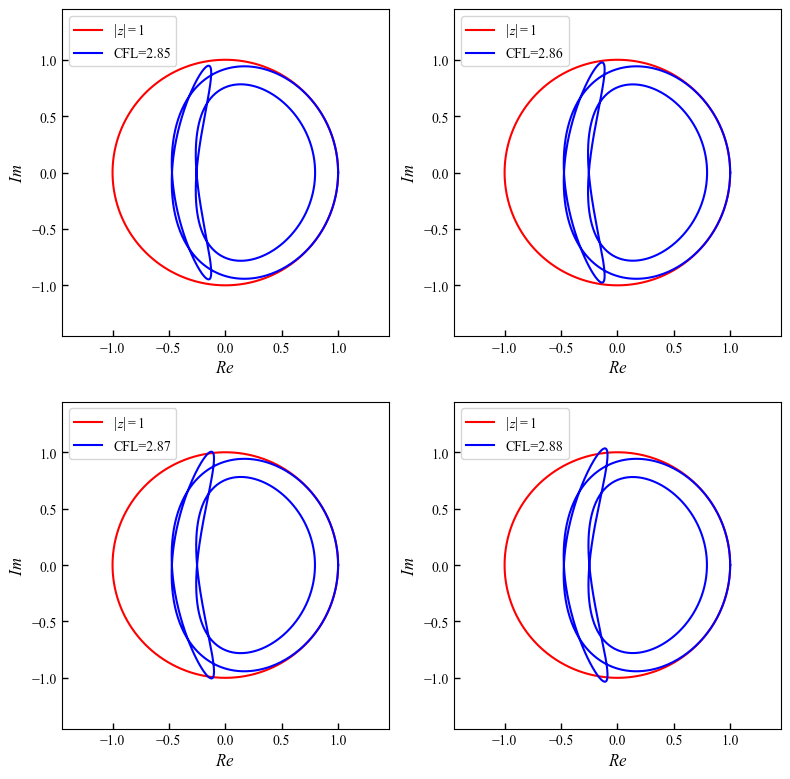

In [12]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[2.85,2.86,2.87,2.88]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['2.85','2.86','2.87','2.88']
#['2√2','2.8931','2.8932','3']
mu=0.005
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [13]:
mu=0.0001
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 2.8293, 放大因子在单位圆内: False


2.8284271247461903
CFL: 2.8284271247461903, 放大因子在单位圆内: True
2.83
CFL: 2.83, 放大因子在单位圆内: False
2.84
CFL: 2.84, 放大因子在单位圆内: False
2.85
CFL: 2.85, 放大因子在单位圆内: False


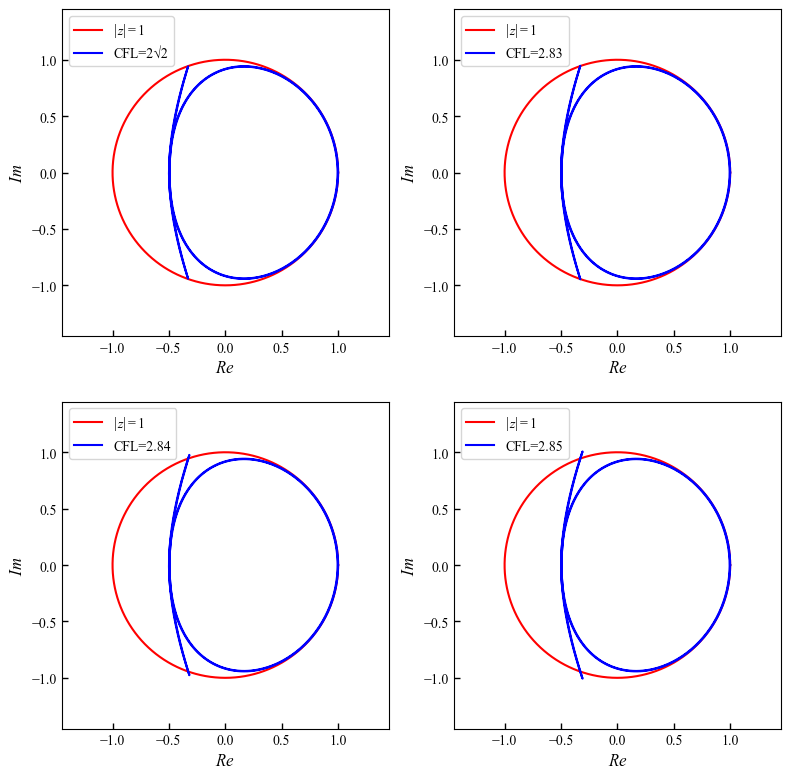

In [14]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[2*np.sqrt(2),2.83,2.84,2.85]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['2√2','2.83','2.84','2.85']
#['2√2','2.8931','2.8932','3']
mu=0.0001
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [15]:
mu=0.05
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 2.706, 放大因子在单位圆内: False


2.69
CFL: 2.69, 放大因子在单位圆内: True
2.7
CFL: 2.7, 放大因子在单位圆内: True
2.71
CFL: 2.71, 放大因子在单位圆内: False
2.72
CFL: 2.72, 放大因子在单位圆内: False


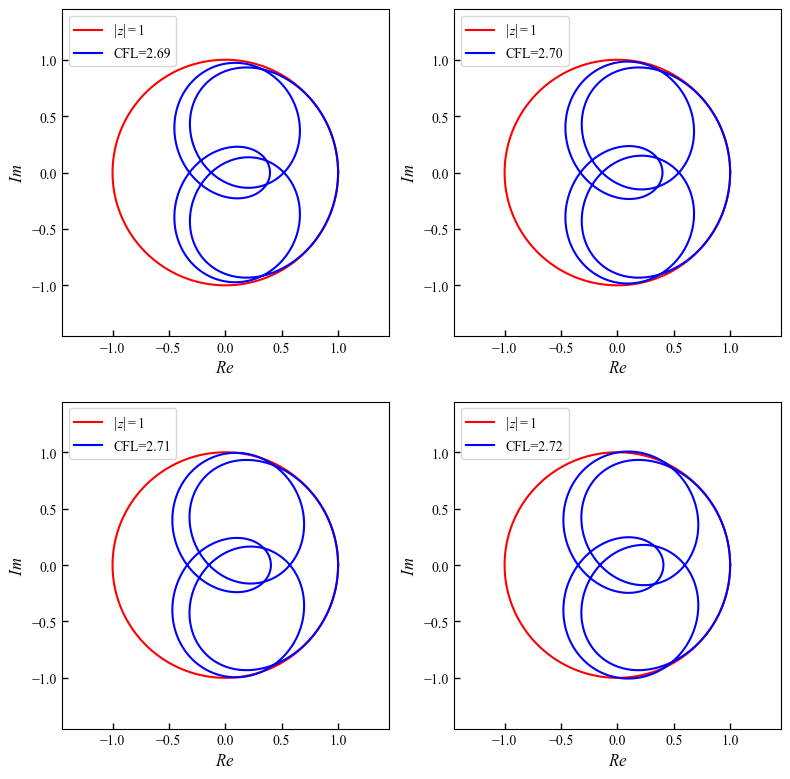

In [16]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[2.69,2.70,2.71,2.72]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['2.69','2.70','2.71','2.72']
#['2√2','2.8931','2.8932','3']
mu=0.05
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

In [17]:
mu=0.5
for c in np.linspace(0,3,10001):
    if not np.max(np.abs(G(Z(theta,c,mu))))<=1:
        print("CFL: {}, 放大因子在单位圆内: {}".format(c,np.max(np.abs(G(Z(theta,c,mu))))<=1))
        break

CFL: 0.34829999999999994, 放大因子在单位圆内: False


0.33
CFL: 0.33, 放大因子在单位圆内: True
0.34
CFL: 0.34, 放大因子在单位圆内: True
0.35
CFL: 0.35, 放大因子在单位圆内: False
0.36
CFL: 0.36, 放大因子在单位圆内: False


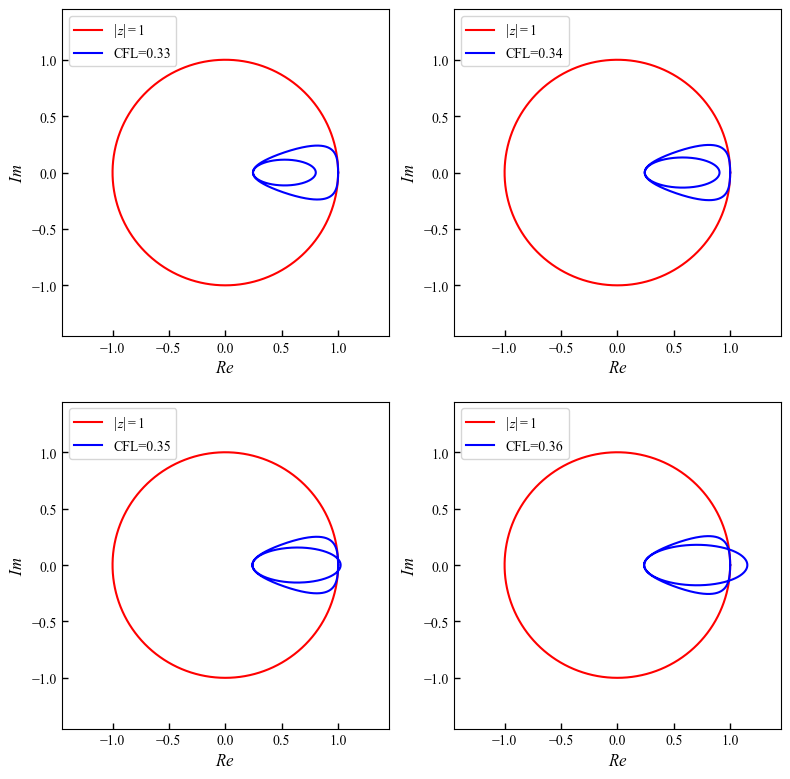

In [18]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
_list=[0.33,0.34,0.35,0.36]#[2*np.sqrt(2),2.8931,2.8932,3]
_name=['0.33','0.34','0.35','0.36']
#['2√2','2.8931','2.8932','3']
mu=0.5
for i in range(len(_list)):
    print(_list[i])
    set_axis(axarr[i//2][i%2],xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
    axarr[i//2][i%2].plot(np.cos(theta),np.sin(theta),color='red',label=r'$|\,z|=1$')
    axarr[i//2][i%2].plot(np.real(G(Z(theta,_list[i],mu))),np.imag(G(Z(theta,_list[i],mu))),label='CFL='+_name[i],color='blue')#r'$G(z),c=$'+"{}".format(_list[i])
    print("CFL: {}, 放大因子在单位圆内: {}".format(_list[i],np.max(np.abs(G(Z(theta,_list[i],mu))))<=1))
    axarr[i//2][i%2].set_xlim(-1.45,1.45)
    axarr[i//2][i%2].set_ylim(-1.45,1.45)
    axarr[i//2][i%2].legend(loc='upper left')#
plt.tight_layout()
plt.show()

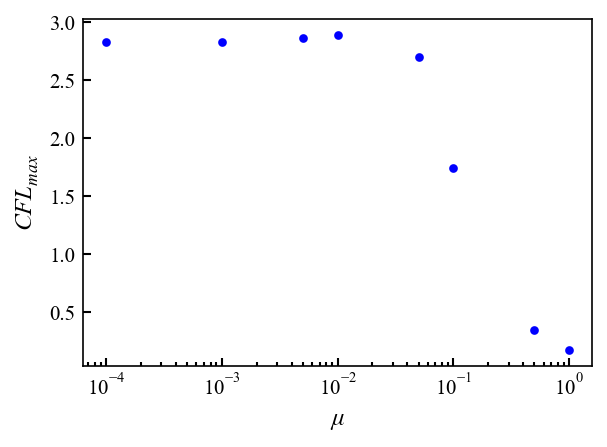

In [19]:
fig=plt.figure(figsize=(5, 3),dpi=150)
set_axis(plt.gca(),xmaj=0.5,xmin=0.5,ymaj=0.5,ymin=0.5,aspect=1)
mu_list=[0.01,0.1,1,0.001,0.005,0.0001,0.05,0.5]
CFL_list=[2.89,1.74,0.17,2.83,2.86,2.83,2.70,0.34]
plt.scatter(mu_list,CFL_list,marker='o',color='blue',s=10)
plt.xscale('log')
plt.xlabel(r'$\mu$',fontdict={'size': 12})
plt.ylabel(r'$CFL_{max}$',fontdict={'size': 12})
plt.show()